# Here I calculated the metrics for each strategy and saved in an excel and plotted

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel

In [16]:
# Read Excel file
data_CC2_CAll = pd.read_excel("C:/Users/raulo/Desktop/ze_vids/phase_3/Excels/Data_for_R.xlsx", sheet_name="CC2_CAll")

data_CC4_CC4 = pd.read_excel("C:/Users/raulo/Desktop/ze_vids/phase_3/Excels/Data_for_R.xlsx", sheet_name="CC4_CC4")

data_CC4_C5 = pd.read_excel("C:/Users/raulo/Desktop/ze_vids/phase_3/Excels/Data_for_R.xlsx", sheet_name="CC4_C5")

data_CC2_C5 = pd.read_excel("C:/Users/raulo/Desktop/ze_vids/phase_3/Excels/Data_for_R.xlsx", sheet_name="CC2_C5")

# Data CC2_CAll
## Subset data for Margin = 0

In [3]:
data_CC2_CAll_M0 = data_CC2_CAll[data_CC2_CAll['Margin'] == 0].copy()

# Calculate TN_Frames, TP_Frames, FN_Frames, FP_Frames
data_CC2_CAll_M0['TN_Frames'] = data_CC2_CAll_M0['Total_Video_Frames'] - data_CC2_CAll_M0['True_Frames'] - data_CC2_CAll_M0['Wrong_Frames']
data_CC2_CAll_M0['TP_Frames'] = data_CC2_CAll_M0['Correct_Frames']
data_CC2_CAll_M0['FN_Frames'] = data_CC2_CAll_M0['True_Frames'] - data_CC2_CAll_M0['Correct_Frames']
data_CC2_CAll_M0['FP_Frames'] = data_CC2_CAll_M0['Wrong_Frames']

# Calculate precision
data_CC2_CAll_M0['precision_frames'] = data_CC2_CAll_M0['TP_Frames'] / (data_CC2_CAll_M0['TP_Frames'] + data_CC2_CAll_M0['FP_Frames'])

# Calculate recall
data_CC2_CAll_M0['recall_frames'] = data_CC2_CAll_M0['TP_Frames'] / (data_CC2_CAll_M0['TP_Frames'] + data_CC2_CAll_M0['FN_Frames'])

# Calculate F1 score
data_CC2_CAll_M0['f1_score_frames'] = 2 * (data_CC2_CAll_M0['precision_frames'] * data_CC2_CAll_M0['recall_frames']) / (data_CC2_CAll_M0['precision_frames'] + data_CC2_CAll_M0['recall_frames'])

# Calculate Accuracy
data_CC2_CAll_M0['accuracy_frames'] = (data_CC2_CAll_M0['TP_Frames'] + data_CC2_CAll_M0['TN_Frames']) / (data_CC2_CAll_M0['TP_Frames'] + data_CC2_CAll_M0['FN_Frames'] + data_CC2_CAll_M0['TN_Frames'] + data_CC2_CAll_M0['FP_Frames'])

# Calculate Specificity
data_CC2_CAll_M0['Specificity'] = data_CC2_CAll_M0['TN_Frames'] / (data_CC2_CAll_M0['TN_Frames'] + data_CC2_CAll_M0['FP_Frames'])

# Calculate mean metrics
mean_metrics_frames_CC2_CAll_M0 = data_CC2_CAll_M0.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]

#print(mean_metrics_frames_CC2_CAll_M0.round(3))
#mean_metrics_frames_CC2_CAll_M0.round(3).to_excel(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\mean_metrics_frames_CC2_CAll_M0.xlsx")

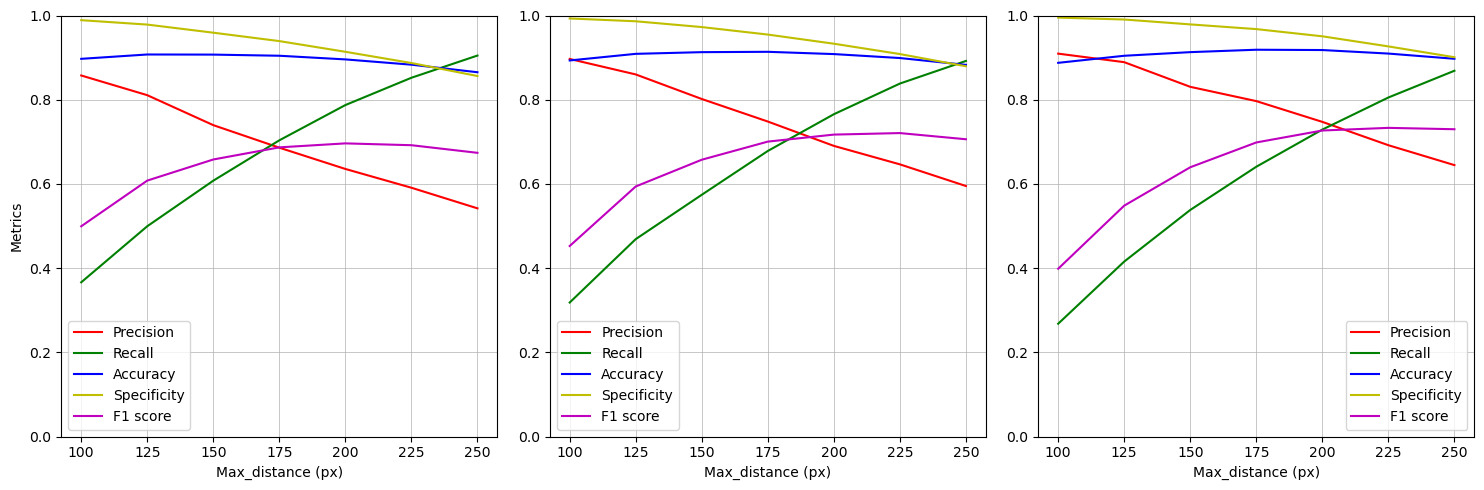

In [9]:
# Separate data based on Min_frames
min_frames_30 = mean_metrics_frames_CC2_CAll_M0.xs(30, level='Min_frames')
min_frames_45 = mean_metrics_frames_CC2_CAll_M0.xs(45, level='Min_frames')
min_frames_60 = mean_metrics_frames_CC2_CAll_M0.xs(60, level='Min_frames')

# Plotting for Min_frames = 30
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(min_frames_30.index, min_frames_30['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_30.index, min_frames_30['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_30.index, min_frames_30['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_30['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_30['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 30)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 45
plt.subplot(1, 3, 2)
plt.plot(min_frames_45.index, min_frames_45['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_45.index, min_frames_45['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_45.index, min_frames_45['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_45['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_45['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 45)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 60
plt.subplot(1, 3, 3)
plt.plot(min_frames_60.index, min_frames_60['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_60.index, min_frames_60['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_60.index, min_frames_60['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_60['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_60['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 60)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

plt.subplots_adjust(wspace=2)

plt.tight_layout()
plt.savefig(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\plot_mean_metrics_frames_CC2_CAll_M0.png")
plt.show()

## Subset data for Margin = 30

In [4]:
data_CC2_CAll_M30 = data_CC2_CAll[data_CC2_CAll['Margin'] == 30].copy()

# Calculate TN_Frames, TP_Frames, FN_Frames, FP_Frames
data_CC2_CAll_M30['TN_Frames'] = data_CC2_CAll_M30['Total_Video_Frames'] - data_CC2_CAll_M30['True_Frames'] - data_CC2_CAll_M30['Wrong_Frames']
data_CC2_CAll_M30['TP_Frames'] = data_CC2_CAll_M30['Correct_Frames']
data_CC2_CAll_M30['FN_Frames'] = data_CC2_CAll_M30['True_Frames'] - data_CC2_CAll_M30['Correct_Frames']
data_CC2_CAll_M30['FP_Frames'] = data_CC2_CAll_M30['Wrong_Frames']

# Calculate precision
data_CC2_CAll_M30['precision_frames'] = data_CC2_CAll_M30['TP_Frames'] / (data_CC2_CAll_M30['TP_Frames'] + data_CC2_CAll_M30['FP_Frames'])

# Calculate recall
data_CC2_CAll_M30['recall_frames'] = data_CC2_CAll_M30['TP_Frames'] / (data_CC2_CAll_M30['TP_Frames'] + data_CC2_CAll_M30['FN_Frames'])

# Calculate F1 score
data_CC2_CAll_M30['f1_score_frames'] = 2 * (data_CC2_CAll_M30['precision_frames'] * data_CC2_CAll_M30['recall_frames']) / (data_CC2_CAll_M30['precision_frames'] + data_CC2_CAll_M30['recall_frames'])

# Calculate Accuracy
data_CC2_CAll_M30['accuracy_frames'] = (data_CC2_CAll_M30['TP_Frames'] + data_CC2_CAll_M30['TN_Frames']) / (data_CC2_CAll_M30['TP_Frames'] + data_CC2_CAll_M30['FN_Frames'] + data_CC2_CAll_M30['TN_Frames'] + data_CC2_CAll_M30['FP_Frames'])

# Calculate Specificity
data_CC2_CAll_M30['Specificity'] = data_CC2_CAll_M30['TN_Frames'] / (data_CC2_CAll_M30['TN_Frames'] + data_CC2_CAll_M30['FP_Frames'])

# Calculate mean metrics
mean_metrics_frames_CC2_CAll_M30 = data_CC2_CAll_M30.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]

#print(mean_metrics_frames_CC2_CAll_M30.round(3))

# Save mean metrics to Excel
#mean_metrics_frames_CC2_CAll_M30.round(3).to_excel(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\mean_metrics_frames_CC2_CAll_M30.xlsx")

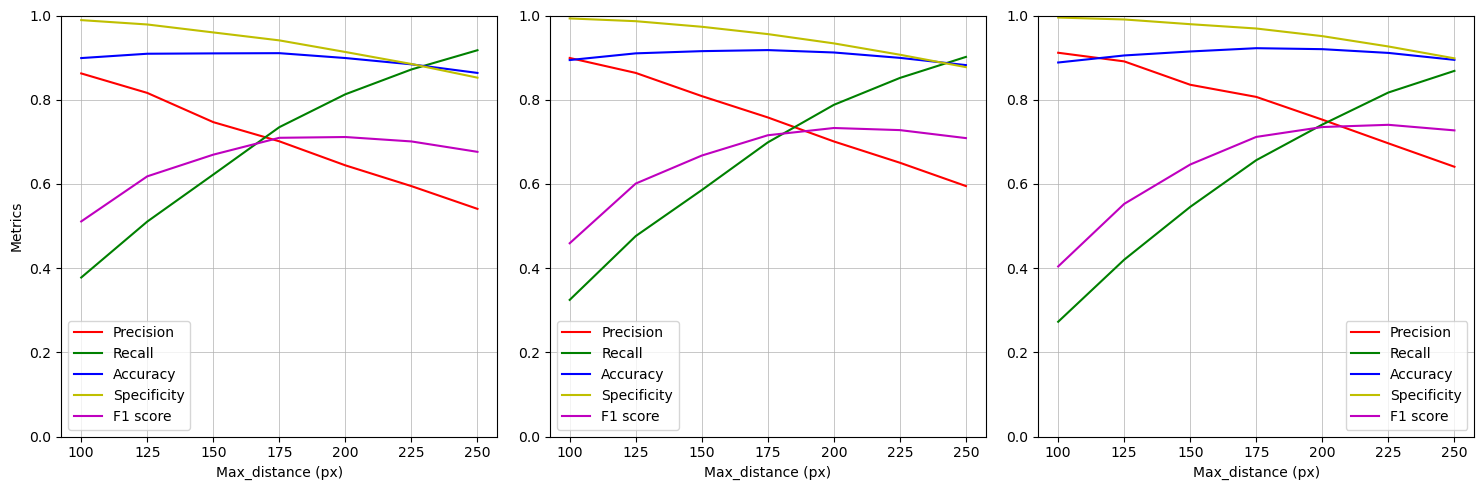

In [11]:
# Separate data based on Min_frames
min_frames_30 = mean_metrics_frames_CC2_CAll_M30.xs(30, level='Min_frames')
min_frames_45 = mean_metrics_frames_CC2_CAll_M30.xs(45, level='Min_frames')
min_frames_60 = mean_metrics_frames_CC2_CAll_M30.xs(60, level='Min_frames')

# Plotting for Min_frames = 30
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(min_frames_30.index, min_frames_30['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_30.index, min_frames_30['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_30.index, min_frames_30['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_30['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_30['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 30)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 45
plt.subplot(1, 3, 2)
plt.plot(min_frames_45.index, min_frames_45['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_45.index, min_frames_45['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_45.index, min_frames_45['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_45['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_45['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 45)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 60
plt.subplot(1, 3, 3)
plt.plot(min_frames_60.index, min_frames_60['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_60.index, min_frames_60['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_60.index, min_frames_60['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_60['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_60['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 60)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

plt.subplots_adjust(wspace=2)

plt.tight_layout()
plt.savefig(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\plot_mean_metrics_frames_CC2_CAll_M30.png")
plt.show()

# Data CC4_CC4
## Subset data for Margin = 0

In [5]:
data_CC4_CC4_M0 = data_CC4_CC4[data_CC4_CC4['Margin'] == 0].copy()

# Calculate TN_Frames, TP_Frames, FN_Frames, FP_Frames
data_CC4_CC4_M0['TN_Frames'] = data_CC4_CC4_M0['Total_Video_Frames'] - data_CC4_CC4_M0['True_Frames'] - data_CC4_CC4_M0['Wrong_Frames']
data_CC4_CC4_M0['TP_Frames'] = data_CC4_CC4_M0['Correct_Frames']
data_CC4_CC4_M0['FN_Frames'] = data_CC4_CC4_M0['True_Frames'] - data_CC4_CC4_M0['Correct_Frames']
data_CC4_CC4_M0['FP_Frames'] = data_CC4_CC4_M0['Wrong_Frames']

# Calculate precision
data_CC4_CC4_M0['precision_frames'] = data_CC4_CC4_M0['TP_Frames'] / (data_CC4_CC4_M0['TP_Frames'] + data_CC4_CC4_M0['FP_Frames'])

# Calculate recall
data_CC4_CC4_M0['recall_frames'] = data_CC4_CC4_M0['TP_Frames'] / (data_CC4_CC4_M0['TP_Frames'] + data_CC4_CC4_M0['FN_Frames'])

# Calculate F1 score
data_CC4_CC4_M0['f1_score_frames'] = 2 * (data_CC4_CC4_M0['precision_frames'] * data_CC4_CC4_M0['recall_frames']) / (data_CC4_CC4_M0['precision_frames'] + data_CC4_CC4_M0['recall_frames'])

# Calculate Accuracy
data_CC4_CC4_M0['accuracy_frames'] = (data_CC4_CC4_M0['TP_Frames'] + data_CC4_CC4_M0['TN_Frames']) / (data_CC4_CC4_M0['TP_Frames'] + data_CC4_CC4_M0['FN_Frames'] + data_CC4_CC4_M0['TN_Frames'] + data_CC4_CC4_M0['FP_Frames'])

# Calculate Specificity
data_CC4_CC4_M0['Specificity'] = data_CC4_CC4_M0['TN_Frames'] / (data_CC4_CC4_M0['TN_Frames'] + data_CC4_CC4_M0['FP_Frames'])

# Calculate mean metrics
mean_metrics_frames_CC4_CC4_M0 = data_CC4_CC4_M0.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]

#print(mean_metrics_frames_CC4_CC4_M0.round(3))

# Save mean metrics to Excel
#mean_metrics_frames_CC4_CC4_M0.round(3).to_excel(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\mean_metrics_frames_CC4_CC4_M0.xlsx")

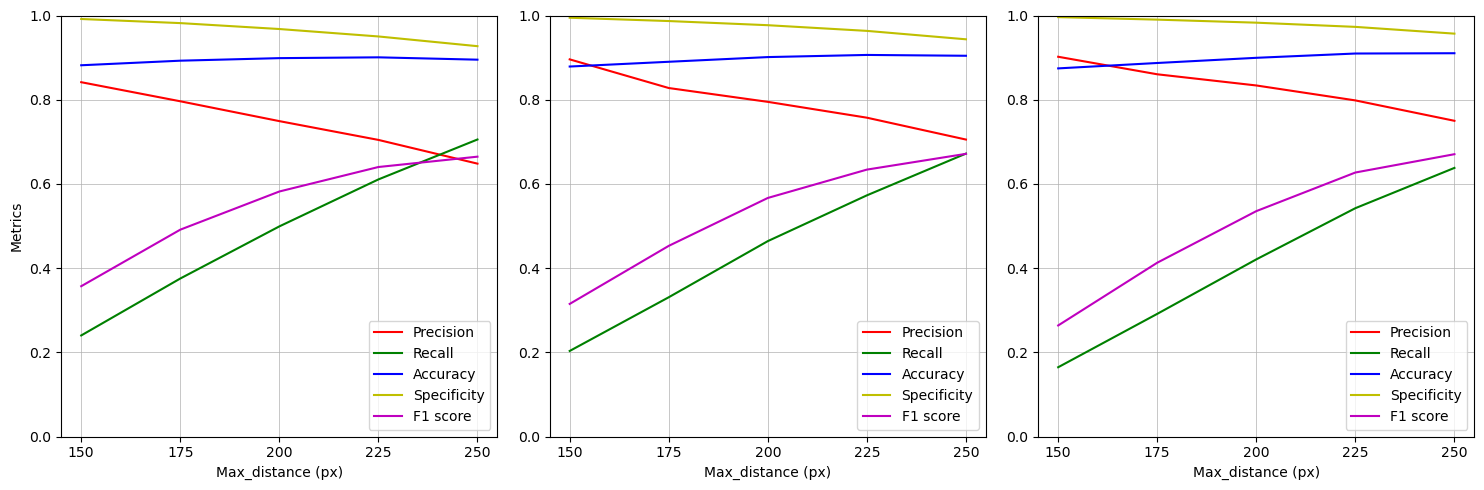

In [13]:
# Separate data based on Min_frames
min_frames_30 = mean_metrics_frames_CC4_CC4_M0.xs(30, level='Min_frames')
min_frames_45 = mean_metrics_frames_CC4_CC4_M0.xs(45, level='Min_frames')
min_frames_60 = mean_metrics_frames_CC4_CC4_M0.xs(60, level='Min_frames')

# Plotting for Min_frames = 30
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(min_frames_30.index, min_frames_30['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_30.index, min_frames_30['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_30.index, min_frames_30['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_30['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_30['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 30)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 45
plt.subplot(1, 3, 2)
plt.plot(min_frames_45.index, min_frames_45['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_45.index, min_frames_45['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_45.index, min_frames_45['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_45['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_45['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 45)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 60
plt.subplot(1, 3, 3)
plt.plot(min_frames_60.index, min_frames_60['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_60.index, min_frames_60['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_60.index, min_frames_60['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_60['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_60['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 60)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

plt.subplots_adjust(wspace=2)

plt.tight_layout()
plt.savefig(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\plot_mean_metrics_frames_CC4_CC4_M0.png")
plt.show()

## Subset data for Margin = 30

In [6]:
# Subset data for Margin = 30
data_CC4_CC4_M30 = data_CC4_CC4[data_CC4_CC4['Margin'] == 30].copy()

# Calculate TN_Frames, TP_Frames, FN_Frames, FP_Frames
data_CC4_CC4_M30['TN_Frames'] = data_CC4_CC4_M30['Total_Video_Frames'] - data_CC4_CC4_M30['True_Frames'] - data_CC4_CC4_M30['Wrong_Frames']
data_CC4_CC4_M30['TP_Frames'] = data_CC4_CC4_M30['Correct_Frames']
data_CC4_CC4_M30['FN_Frames'] = data_CC4_CC4_M30['True_Frames'] - data_CC4_CC4_M30['Correct_Frames']
data_CC4_CC4_M30['FP_Frames'] = data_CC4_CC4_M30['Wrong_Frames']

# Calculate precision
data_CC4_CC4_M30['precision_frames'] = data_CC4_CC4_M30['TP_Frames'] / (data_CC4_CC4_M30['TP_Frames'] + data_CC4_CC4_M30['FP_Frames'])

# Calculate recall
data_CC4_CC4_M30['recall_frames'] = data_CC4_CC4_M30['TP_Frames'] / (data_CC4_CC4_M30['TP_Frames'] + data_CC4_CC4_M30['FN_Frames'])

# Calculate F1 score
data_CC4_CC4_M30['f1_score_frames'] = 2 * (data_CC4_CC4_M30['precision_frames'] * data_CC4_CC4_M30['recall_frames']) / (data_CC4_CC4_M30['precision_frames'] + data_CC4_CC4_M30['recall_frames'])

# Calculate Accuracy
data_CC4_CC4_M30['accuracy_frames'] = (data_CC4_CC4_M30['TP_Frames'] + data_CC4_CC4_M30['TN_Frames']) / (data_CC4_CC4_M30['TP_Frames'] + data_CC4_CC4_M30['FN_Frames'] + data_CC4_CC4_M30['TN_Frames'] + data_CC4_CC4_M30['FP_Frames'])

# Calculate Specificity
data_CC4_CC4_M30['Specificity'] = data_CC4_CC4_M30['TN_Frames'] / (data_CC4_CC4_M30['TN_Frames'] + data_CC4_CC4_M30['FP_Frames'])

# Calculate mean metrics
mean_metrics_frames_CC4_CC4_M30 = data_CC4_CC4_M30.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]

#print(mean_metrics_frames_CC4_CC4_M30.round(3))

# Save mean metrics to Excel
#mean_metrics_frames_CC4_CC4_M30.round(3).to_excel(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\mean_metrics_frames_CC4_CC4_M30.xlsx")

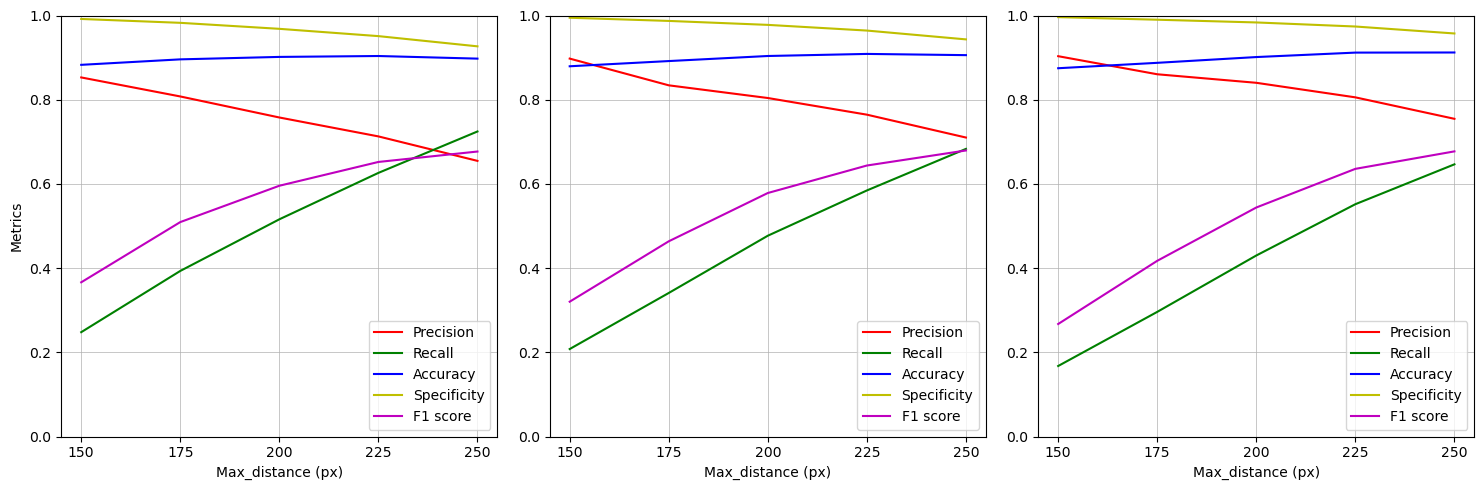

In [15]:
# Separate data based on Min_frames
min_frames_30 = mean_metrics_frames_CC4_CC4_M30.xs(30, level='Min_frames')
min_frames_45 = mean_metrics_frames_CC4_CC4_M30.xs(45, level='Min_frames')
min_frames_60 = mean_metrics_frames_CC4_CC4_M30.xs(60, level='Min_frames')

# Plotting for Min_frames = 30
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(min_frames_30.index, min_frames_30['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_30.index, min_frames_30['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_30.index, min_frames_30['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_30['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_30['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 30)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 45
plt.subplot(1, 3, 2)
plt.plot(min_frames_45.index, min_frames_45['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_45.index, min_frames_45['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_45.index, min_frames_45['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_45['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_45['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 45)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 60
plt.subplot(1, 3, 3)
plt.plot(min_frames_60.index, min_frames_60['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_60.index, min_frames_60['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_60.index, min_frames_60['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_60['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_60['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 60)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

plt.subplots_adjust(wspace=2)

plt.tight_layout()
plt.savefig(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\plot_mean_metrics_frames_CC4_CC4_M30.png")
plt.show()

# Data CC4_C5
## Subset data for Margin = 0

In [7]:
data_CC4_C5_M0 = data_CC4_C5[data_CC4_C5['Margin'] == 0].copy()

# Calculate TN_Frames, TP_Frames, FN_Frames, FP_Frames
data_CC4_C5_M0['TN_Frames'] = data_CC4_C5_M0['Total_Video_Frames'] - data_CC4_C5_M0['True_Frames'] - data_CC4_C5_M0['Wrong_Frames']
data_CC4_C5_M0['TP_Frames'] = data_CC4_C5_M0['Correct_Frames']
data_CC4_C5_M0['FN_Frames'] = data_CC4_C5_M0['True_Frames'] - data_CC4_C5_M0['Correct_Frames']
data_CC4_C5_M0['FP_Frames'] = data_CC4_C5_M0['Wrong_Frames']

# Calculate precision
data_CC4_C5_M0['precision_frames'] = data_CC4_C5_M0['TP_Frames'] / (data_CC4_C5_M0['TP_Frames'] + data_CC4_C5_M0['FP_Frames'])

# Calculate recall
data_CC4_C5_M0['recall_frames'] = data_CC4_C5_M0['TP_Frames'] / (data_CC4_C5_M0['TP_Frames'] + data_CC4_C5_M0['FN_Frames'])

# Calculate F1 score
data_CC4_C5_M0['f1_score_frames'] = 2 * (data_CC4_C5_M0['precision_frames'] * data_CC4_C5_M0['recall_frames']) / (data_CC4_C5_M0['precision_frames'] + data_CC4_C5_M0['recall_frames'])

# Calculate Accuracy
data_CC4_C5_M0['accuracy_frames'] = (data_CC4_C5_M0['TP_Frames'] + data_CC4_C5_M0['TN_Frames']) / (data_CC4_C5_M0['TP_Frames'] + data_CC4_C5_M0['FN_Frames'] + data_CC4_C5_M0['TN_Frames'] + data_CC4_C5_M0['FP_Frames'])

# Calculate Specificity
data_CC4_C5_M0['Specificity'] = data_CC4_C5_M0['TN_Frames'] / (data_CC4_C5_M0['TN_Frames'] + data_CC4_C5_M0['FP_Frames'])

# Calculate mean metrics
mean_metrics_frames_CC4_C5_M0 = data_CC4_C5_M0.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]

#print(mean_metrics_frames_CC4_C5_M0.round(3))

# Save mean metrics to Excel
#mean_metrics_frames_CC4_C5_M0.round(3).to_excel(r"C:/Users/raulo/Desktop/ze_vids/phase_3/Excels/Metrics/mean_metrics_frames_CC4_C5_M0.xlsx")


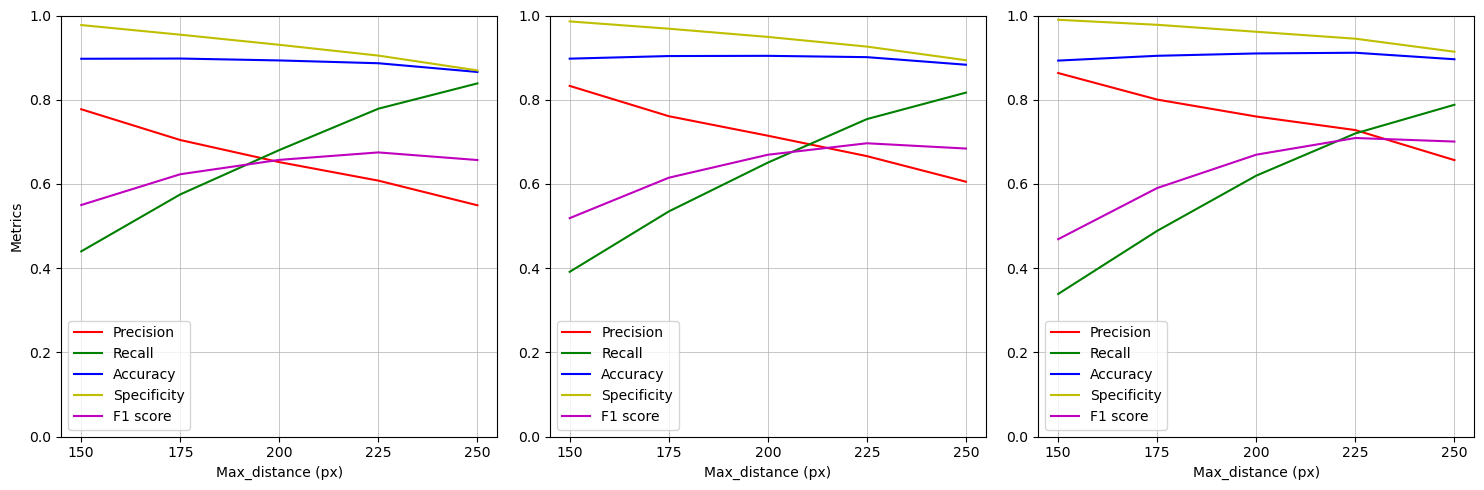

In [17]:
# Separate data based on Min_frames
min_frames_30 = mean_metrics_frames_CC4_C5_M0.xs(30, level='Min_frames')
min_frames_45 = mean_metrics_frames_CC4_C5_M0.xs(45, level='Min_frames')
min_frames_60 = mean_metrics_frames_CC4_C5_M0.xs(60, level='Min_frames')

# Plotting for Min_frames = 30
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(min_frames_30.index, min_frames_30['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_30.index, min_frames_30['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_30.index, min_frames_30['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_30['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_30['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 30)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 45
plt.subplot(1, 3, 2)
plt.plot(min_frames_45.index, min_frames_45['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_45.index, min_frames_45['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_45.index, min_frames_45['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_45['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_45['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 45)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 60
plt.subplot(1, 3, 3)
plt.plot(min_frames_60.index, min_frames_60['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_60.index, min_frames_60['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_60.index, min_frames_60['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_60['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_60['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 60)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

plt.subplots_adjust(wspace=2)

plt.tight_layout()
plt.savefig(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\plot_mean_metrics_frames_CC4_C5_M0.png")
plt.show()

## Subset data for Margin = 30

In [8]:
# Subset data for Margin = 30
data_CC4_C5_M30 = data_CC4_C5[data_CC4_C5['Margin'] == 30].copy()

# Calculate TN_Frames, TP_Frames, FN_Frames, FP_Frames
data_CC4_C5_M30['TN_Frames'] = data_CC4_C5_M30['Total_Video_Frames'] - data_CC4_C5_M30['True_Frames'] - data_CC4_C5_M30['Wrong_Frames']
data_CC4_C5_M30['TP_Frames'] = data_CC4_C5_M30['Correct_Frames']
data_CC4_C5_M30['FN_Frames'] = data_CC4_C5_M30['True_Frames'] - data_CC4_C5_M30['Correct_Frames']
data_CC4_C5_M30['FP_Frames'] = data_CC4_C5_M30['Wrong_Frames']

# Calculate precision
data_CC4_C5_M30['precision_frames'] = data_CC4_C5_M30['TP_Frames'] / (data_CC4_C5_M30['TP_Frames'] + data_CC4_C5_M30['FP_Frames'])

# Calculate recall
data_CC4_C5_M30['recall_frames'] = data_CC4_C5_M30['TP_Frames'] / (data_CC4_C5_M30['TP_Frames'] + data_CC4_C5_M30['FN_Frames'])

# Calculate F1 score
data_CC4_C5_M30['f1_score_frames'] = 2 * (data_CC4_C5_M30['precision_frames'] * data_CC4_C5_M30['recall_frames']) / (data_CC4_C5_M30['precision_frames'] + data_CC4_C5_M30['recall_frames'])

# Calculate Accuracy
data_CC4_C5_M30['accuracy_frames'] = (data_CC4_C5_M30['TP_Frames'] + data_CC4_C5_M30['TN_Frames']) / (data_CC4_C5_M30['TP_Frames'] + data_CC4_C5_M30['FN_Frames'] + data_CC4_C5_M30['TN_Frames'] + data_CC4_C5_M30['FP_Frames'])

# Calculate Specificity
data_CC4_C5_M30['Specificity'] = data_CC4_C5_M30['TN_Frames'] / (data_CC4_C5_M30['TN_Frames'] + data_CC4_C5_M30['FP_Frames'])

# Calculate mean metrics
mean_metrics_frames_CC4_C5_M30 = data_CC4_C5_M30.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]

#print(mean_metrics_frames_CC4_C5_M30.round(3))

# Save mean metrics to Excel
#mean_metrics_frames_CC4_C5_M30.round(3).to_excel(r"C:/Users/raulo/Desktop/ze_vids/phase_3/Excels/Metrics/mean_metrics_frames_CC4_C5_M30.xlsx")## Subset data for Margin = 30

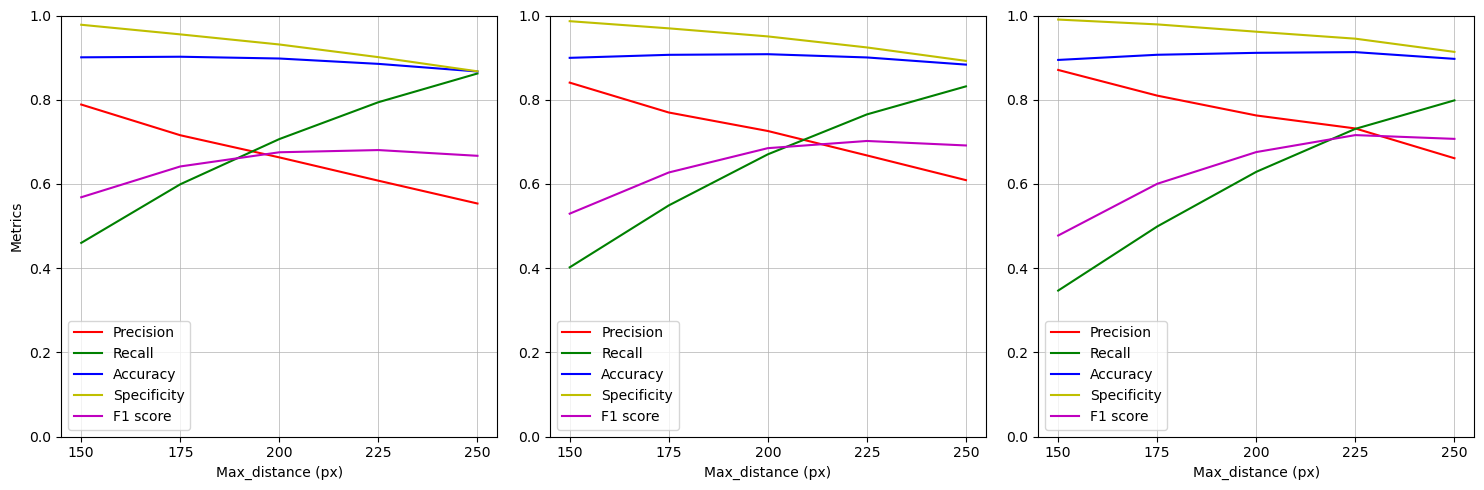

In [19]:
# Separate data based on Min_frames
min_frames_30 = mean_metrics_frames_CC4_C5_M30.xs(30, level='Min_frames')
min_frames_45 = mean_metrics_frames_CC4_C5_M30.xs(45, level='Min_frames')
min_frames_60 = mean_metrics_frames_CC4_C5_M30.xs(60, level='Min_frames')

# Plotting for Min_frames = 30
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(min_frames_30.index, min_frames_30['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_30.index, min_frames_30['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_30.index, min_frames_30['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_30['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_30['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 30)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 45
plt.subplot(1, 3, 2)
plt.plot(min_frames_45.index, min_frames_45['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_45.index, min_frames_45['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_45.index, min_frames_45['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_45['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_45['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 45)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 60
plt.subplot(1, 3, 3)
plt.plot(min_frames_60.index, min_frames_60['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_60.index, min_frames_60['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_60.index, min_frames_60['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_60['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_60['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 60)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

plt.subplots_adjust(wspace=2)

plt.tight_layout()
plt.savefig(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\plot_mean_metrics_frames_CC4_C5_M30.png")
plt.show()

# Data CC2_C5
## Subset data for Margin = 0

In [19]:
# Subset data for Margin = 0
data_CC2_C5_M0 = data_CC2_C5[data_CC2_C5['Margin'] == 0].copy()

# Calculate TN_Frames, TP_Frames, FN_Frames, FP_Frames
data_CC2_C5_M0['TN_Frames'] = data_CC2_C5_M0['Total_Video_Frames'] - data_CC2_C5_M0['True_Frames'] - data_CC2_C5_M0['Wrong_Frames']
data_CC2_C5_M0['TP_Frames'] = data_CC2_C5_M0['Correct_Frames']
data_CC2_C5_M0['FN_Frames'] = data_CC2_C5_M0['True_Frames'] - data_CC2_C5_M0['Correct_Frames']
data_CC2_C5_M0['FP_Frames'] = data_CC2_C5_M0['Wrong_Frames']

# Calculate precision
data_CC2_C5_M0['precision_frames'] = data_CC2_C5_M0['TP_Frames'] / (data_CC2_C5_M0['TP_Frames'] + data_CC2_C5_M0['FP_Frames']+0.001)

# Calculate recall
data_CC2_C5_M0['recall_frames'] = data_CC2_C5_M0['TP_Frames'] / (data_CC2_C5_M0['TP_Frames'] + data_CC2_C5_M0['FN_Frames'])

# Calculate F1 score
data_CC2_C5_M0['f1_score_frames'] = 2 * (data_CC2_C5_M0['precision_frames'] * data_CC2_C5_M0['recall_frames']) / (data_CC2_C5_M0['precision_frames'] + data_CC2_C5_M0['recall_frames']+0.001)

# Calculate Accuracy
data_CC2_C5_M0['accuracy_frames'] = (data_CC2_C5_M0['TP_Frames'] + data_CC2_C5_M0['TN_Frames']) / (data_CC2_C5_M0['TP_Frames'] + data_CC2_C5_M0['FN_Frames'] + data_CC2_C5_M0['TN_Frames'] + data_CC2_C5_M0['FP_Frames'])

# Calculate Specificity
data_CC2_C5_M0['Specificity'] = data_CC2_C5_M0['TN_Frames'] / (data_CC2_C5_M0['TN_Frames'] + data_CC2_C5_M0['FP_Frames'])

# Calculate mean metrics
mean_metrics_frames_CC2_C5_M0 = data_CC2_C5_M0.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]

print(mean_metrics_frames_CC2_C5_M0.round(3))

# Save mean metrics to Excel
#mean_metrics_frames_CC2_C5_M0.round(3).to_excel(r"C:/Users/raulo/Desktop/ze_vids/phase_3/Excels/Metrics/mean_metrics_frames_CC2_C5_M0.xlsx")

                         precision_frames  recall_frames  accuracy_frames  \
Min_frames Max_distance                                                     
30         100                      0.881          0.151            0.874   
           125                      0.846          0.303            0.889   
           150                      0.786          0.461            0.900   
           175                      0.725          0.581            0.901   
           200                      0.671          0.691            0.899   
           225                      0.628          0.777            0.892   
           250                      0.574          0.839            0.876   
45         100                      0.898          0.105            0.868   
           125                      0.879          0.249            0.884   
           150                      0.851          0.418            0.902   
           175                      0.781          0.542            0.907   

C:\Users\raulo\AppData\Local\Temp\ipykernel_17532\3642071503.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_metrics_frames_CC2_C5_M0 = data_CC2_C5_M0.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]


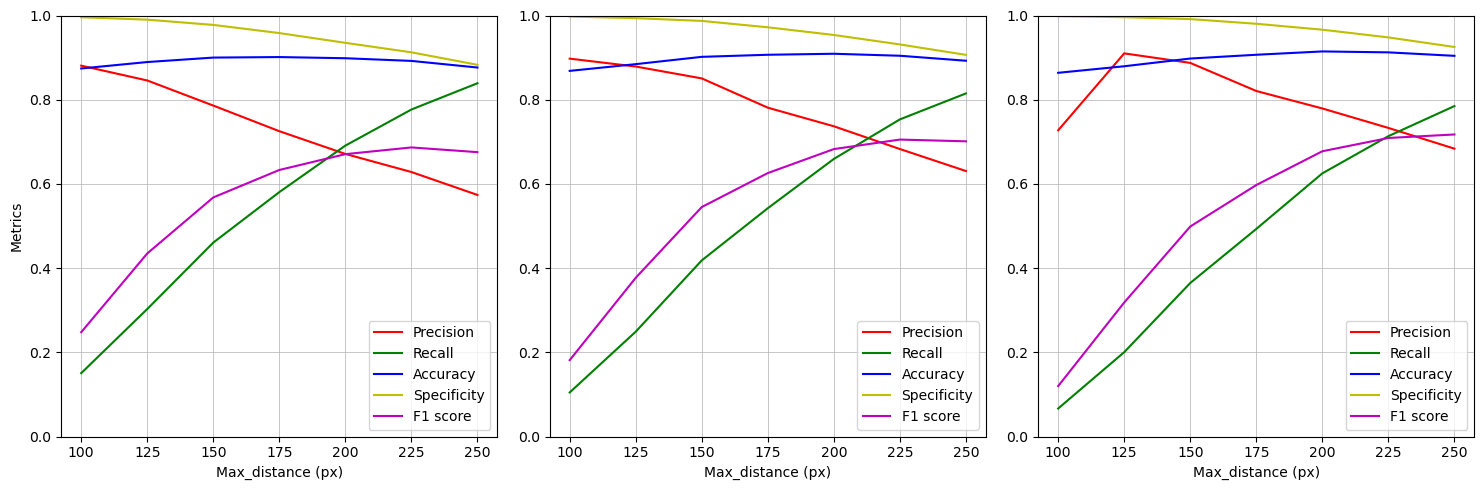

In [21]:
# Separate data based on Min_frames
min_frames_30 = mean_metrics_frames_CC2_C5_M0.xs(30, level='Min_frames')
min_frames_45 = mean_metrics_frames_CC2_C5_M0.xs(45, level='Min_frames')
min_frames_60 = mean_metrics_frames_CC2_C5_M0.xs(60, level='Min_frames')

# Plotting for Min_frames = 30
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(min_frames_30.index, min_frames_30['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_30.index, min_frames_30['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_30.index, min_frames_30['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_30['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_30['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 30)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 45
plt.subplot(1, 3, 2)
plt.plot(min_frames_45.index, min_frames_45['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_45.index, min_frames_45['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_45.index, min_frames_45['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_45['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_45['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 45)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 60
plt.subplot(1, 3, 3)
plt.plot(min_frames_60.index, min_frames_60['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_60.index, min_frames_60['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_60.index, min_frames_60['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_60['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_60['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 60)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

plt.subplots_adjust(wspace=2)

plt.tight_layout()
plt.savefig(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\plot_mean_metrics_frames_CC2_C5_M0.png")
plt.show()

## Subset data for Margin = 30

In [20]:
# Subset data for Margin = 30
data_CC2_C5_M30 = data_CC2_C5[data_CC2_C5['Margin'] == 30].copy()

# Calculate TN_Frames, TP_Frames, FN_Frames, FP_Frames
data_CC2_C5_M30['TN_Frames'] = data_CC2_C5_M30['Total_Video_Frames'] - data_CC2_C5_M30['True_Frames'] - data_CC2_C5_M30['Wrong_Frames']
data_CC2_C5_M30['TP_Frames'] = data_CC2_C5_M30['Correct_Frames']
data_CC2_C5_M30['FN_Frames'] = data_CC2_C5_M30['True_Frames'] - data_CC2_C5_M30['Correct_Frames']
data_CC2_C5_M30['FP_Frames'] = data_CC2_C5_M30['Wrong_Frames']

# Calculate precision
data_CC2_C5_M30['precision_frames'] = (data_CC2_C5_M30['TP_Frames']) / (data_CC2_C5_M30['TP_Frames'] + data_CC2_C5_M30['FP_Frames'] + 0.001)

# Calculate recall
data_CC2_C5_M30['recall_frames'] = data_CC2_C5_M30['TP_Frames'] / (data_CC2_C5_M30['TP_Frames'] + data_CC2_C5_M30['FN_Frames'])

# Calculate F1 score
data_CC2_C5_M30['f1_score_frames'] = 2 * (data_CC2_C5_M30['precision_frames'] * data_CC2_C5_M30['recall_frames']) / (data_CC2_C5_M30['precision_frames'] + data_CC2_C5_M30['recall_frames'] +0.001)

# Calculate Accuracy
data_CC2_C5_M30['accuracy_frames'] = (data_CC2_C5_M30['TP_Frames'] + data_CC2_C5_M30['TN_Frames']) / (data_CC2_C5_M30['TP_Frames'] + data_CC2_C5_M30['FN_Frames'] + data_CC2_C5_M30['TN_Frames'] + data_CC2_C5_M30['FP_Frames'])

# Calculate Specificity
data_CC2_C5_M30['Specificity'] = data_CC2_C5_M30['TN_Frames'] / (data_CC2_C5_M30['TN_Frames'] + data_CC2_C5_M30['FP_Frames'])

# Calculate mean metrics
mean_metrics_frames_CC2_C5_M30 = data_CC2_C5_M30.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]

print(mean_metrics_frames_CC2_C5_M30.round(3))

# Save mean metrics to Excel
#mean_metrics_frames_CC2_C5_M30.round(3).to_excel(r"C:/Users/raulo/Desktop/ze_vids/phase_3/Excels/Metrics/mean_metrics_frames_CC2_C5_M30.xlsx")

                         precision_frames  recall_frames  accuracy_frames  \
Min_frames Max_distance                                                     
30         100                      0.881          0.151            0.874   
           125                      0.846          0.303            0.889   
           150                      0.789          0.461            0.900   
           175                      0.732          0.581            0.902   
           200                      0.669          0.691            0.897   
           225                      0.626          0.777            0.891   
           250                      0.572          0.839            0.875   
45         100                      0.898          0.105            0.868   
           125                      0.879          0.249            0.884   
           150                      0.852          0.418            0.902   
           175                      0.788          0.542            0.908   

C:\Users\raulo\AppData\Local\Temp\ipykernel_17532\733541482.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_metrics_frames_CC2_C5_M30 = data_CC2_C5_M30.groupby(['Min_frames', 'Max_distance']).mean()[['precision_frames', 'recall_frames', 'accuracy_frames', 'Specificity', 'f1_score_frames']]


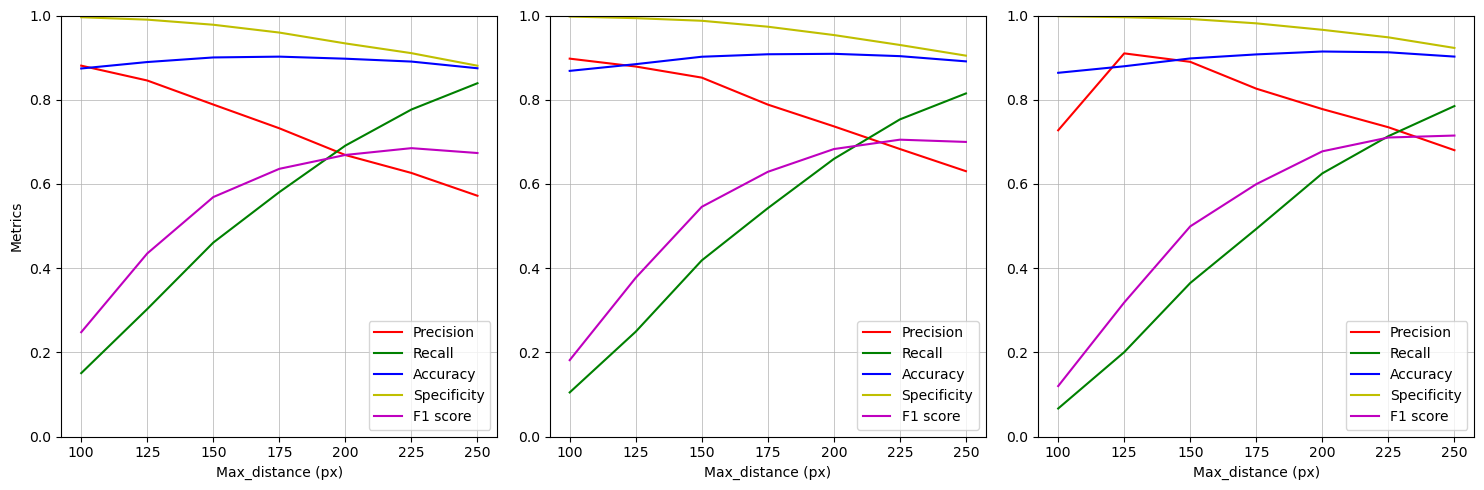

In [23]:
# Separate data based on Min_frames
min_frames_30 = mean_metrics_frames_CC2_C5_M30.xs(30, level='Min_frames')
min_frames_45 = mean_metrics_frames_CC2_C5_M30.xs(45, level='Min_frames')
min_frames_60 = mean_metrics_frames_CC2_C5_M30.xs(60, level='Min_frames')

# Plotting for Min_frames = 30
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(min_frames_30.index, min_frames_30['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_30.index, min_frames_30['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_30.index, min_frames_30['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_30['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_30['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 30)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 45
plt.subplot(1, 3, 2)
plt.plot(min_frames_45.index, min_frames_45['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_45.index, min_frames_45['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_45.index, min_frames_45['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_45['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_45['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 45)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

# Plotting for Min_frames = 60
plt.subplot(1, 3, 3)
plt.plot(min_frames_60.index, min_frames_60['precision_frames'], c='r', label='Precision')
plt.plot(min_frames_60.index, min_frames_60['recall_frames'], c='g', label='Recall')
plt.plot(min_frames_60.index, min_frames_60['accuracy_frames'], c='b', label='Accuracy')
plt.plot(min_frames_30.index, min_frames_60['Specificity'], c='y', label='Specificity')
plt.plot(min_frames_30.index, min_frames_60['f1_score_frames'], c='m', label='F1 score')
plt.xlabel('Max_distance (px)')
#plt.ylabel('Metrics')
#plt.title('Metrics vs. Max_distance (Min_frames = 60)')
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(min(min_frames_30.index), max(min_frames_30.index) + 1, 25))
plt.grid(True, linewidth=0.5)

plt.subplots_adjust(wspace=2)

plt.tight_layout()
plt.savefig(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\plot_mean_metrics_frames_CC2_C5_M30.png")
plt.show()

# T-test to compare Margin values

In [24]:
# List of datasets to compare
datasets = [data_CC2_CAll_M0, data_CC2_CAll_M30, 
            data_CC4_CC4_M0, data_CC4_CC4_M30, 
            data_CC4_C5_M0, data_CC4_C5_M30, 
            data_CC2_C5_M0, data_CC2_C5_M30]

# Perform the operation for each dataset
for dataset in datasets:
    dataset['Correct_Event - Duplicate_Event'] = dataset['Correct_Event'] - dataset['Duplicate_Event']

# Define pairs of datasets to compare along with their names
pairs = [
    (data_CC2_CAll_M0, data_CC2_CAll_M30, "data_CC2_CAll_M0", "data_CC2_CAll_M30"),
    (data_CC4_CC4_M0, data_CC4_CC4_M30, "data_CC4_CC4_M0", "data_CC4_CC4_M30"),
    (data_CC4_C5_M0, data_CC4_C5_M30, "data_CC4_C5_M0", "data_CC4_C5_M30"),
    (data_CC2_C5_M0, data_CC2_C5_M30, "data_CC2_C5_M0", "data_CC2_C5_M30")
]

# Extract relevant columns for comparison
metrics_to_compare = ['precision_frames', 'recall_frames', 'f1_score_frames', 'accuracy_frames', 'Specificity', 
                      'Correct_Event', 'Wrong_Event','Correct_Event - Duplicate_Event', 'Correct_Frames', 'Wrong_Frames']

# Perform t-tests for each pair of datasets
for dataset1, dataset2, name1, name2 in pairs:
    print(f"Comparing {name1} with {name2}:")
    
    for metric in metrics_to_compare:
        # Perform t-test
        t_statistic, p_value = ttest_ind(dataset1[metric], dataset2[metric])
        print(f"T-test for {metric}:")
        print(f"  T-statistic: {t_statistic:.3f}")
        print(f"  P-value: {p_value:.3f}")
    
    print("\n")

Comparing data_CC2_CAll_M0 with data_CC2_CAll_M30:
T-test for precision_frames:
  T-statistic: -0.269
  P-value: 0.788
T-test for recall_frames:
  T-statistic: -0.460
  P-value: 0.646
T-test for f1_score_frames:
  T-statistic: -0.550
  P-value: 0.583
T-test for accuracy_frames:
  T-statistic: -0.252
  P-value: 0.801
T-test for Specificity:
  T-statistic: 0.033
  P-value: 0.974
T-test for Correct_Event:
  T-statistic: 2.665
  P-value: 0.008
T-test for Wrong_Event:
  T-statistic: 0.959
  P-value: 0.339
T-test for Correct_Event - Duplicate_Event:
  T-statistic: -0.201
  P-value: 0.841
T-test for Correct_Frames:
  T-statistic: -0.336
  P-value: 0.737
T-test for Wrong_Frames:
  T-statistic: -0.027
  P-value: 0.979


Comparing data_CC4_CC4_M0 with data_CC4_CC4_M30:
T-test for precision_frames:
  T-statistic: -0.327
  P-value: 0.744
T-test for recall_frames:
  T-statistic: -0.335
  P-value: 0.738
T-test for f1_score_frames:
  T-statistic: -0.371
  P-value: 0.711
T-test for accuracy_frames:
  

In [13]:
# List of datasets to compare
datasets = [data_CC2_CAll_M0, data_CC2_CAll_M30, 
            data_CC4_CC4_M0, data_CC4_CC4_M30, 
            data_CC4_C5_M0, data_CC4_C5_M30, 
            data_CC2_C5_M0, data_CC2_C5_M30]

# Perform the operation for each dataset
for dataset in datasets:
    dataset['Correct_Event - Duplicate_Event'] = dataset['Correct_Event'] - dataset['Duplicate_Event']

# Define pairs of datasets to compare along with their names
pairs = [
    (data_CC2_CAll_M0, data_CC2_CAll_M30, "data_CC2_CAll_M0", "data_CC2_CAll_M30"),
    (data_CC4_CC4_M0, data_CC4_CC4_M30, "data_CC4_CC4_M0", "data_CC4_CC4_M30"),
    (data_CC4_C5_M0, data_CC4_C5_M30, "data_CC4_C5_M0", "data_CC4_C5_M30"),
    (data_CC2_C5_M0, data_CC2_C5_M30, "data_CC2_C5_M0", "data_CC2_C5_M30")
]

# Extract relevant columns for comparison
metrics_to_compare = ['precision_frames', 'recall_frames', 'f1_score_frames', 'accuracy_frames', 'Specificity', 
                      'Correct_Event', 'Wrong_Event','Correct_Event - Duplicate_Event', 'Correct_Frames', 'Wrong_Frames']

# Perform t-tests for each pair of datasets
for dataset1, dataset2, name1, name2 in pairs:
    print(f"Comparing {name1} with {name2}:")
    
    for metric in metrics_to_compare:
        # Perform t-test
        t_statistic, p_value = ttest_rel(dataset1[metric], dataset2[metric])
        print(f"T-test for {metric}:")
        print(f"  T-statistic: {t_statistic:.3f}")
        print(f"  P-value: {p_value:.3f}")
    
    print("\n")

Comparing data_CC2_CAll_M0 with data_CC2_CAll_M30:
T-test for precision_frames:
  T-statistic: -4.263
  P-value: 0.000
T-test for recall_frames:
  T-statistic: -7.819
  P-value: 0.000
T-test for f1_score_frames:
  T-statistic: -6.635
  P-value: 0.000
T-test for accuracy_frames:
  T-statistic: -3.536
  P-value: 0.001
T-test for Specificity:
  T-statistic: 0.775
  P-value: 0.440
T-test for Correct_Event:
  T-statistic: 15.998
  P-value: 0.000
T-test for Wrong_Event:
  T-statistic: 8.467
  P-value: 0.000
T-test for Correct_Event - Duplicate_Event:
  T-statistic: -1.407
  P-value: 0.162
T-test for Correct_Frames:
  T-statistic: -7.885
  P-value: 0.000
T-test for Wrong_Frames:
  T-statistic: -0.683
  P-value: 0.496


Comparing data_CC4_CC4_M0 with data_CC4_CC4_M30:
T-test for precision_frames:
  T-statistic: -6.605
  P-value: 0.000
T-test for recall_frames:
  T-statistic: -11.713
  P-value: 0.000
T-test for f1_score_frames:
  T-statistic: -11.067
  P-value: 0.000
T-test for accuracy_frames:

In [25]:
# Create an empty list to store results
results = []

# Perform t-tests for each pair of datasets
for dataset1, dataset2, name1, name2 in pairs:
    for metric in metrics_to_compare:
        # Perform t-test
        t_statistic, p_value = ttest_ind(dataset1[metric], dataset2[metric])
        # Append results to the list
        results.append([f"{name1} vs {name2}", metric, t_statistic, p_value])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=["Comparison", "Metric", "T-statistic", "P-value"])

# Display the DataFrame
print(results_df)
results_df.to_excel(r"C:\Users\raulo\Desktop\ze_vids\phase_3\Excels\Metrics\t_test_results.xlsx", index=False)


                               Comparison                           Metric  \
0   data_CC2_CAll_M0 vs data_CC2_CAll_M30                 precision_frames   
1   data_CC2_CAll_M0 vs data_CC2_CAll_M30                    recall_frames   
2   data_CC2_CAll_M0 vs data_CC2_CAll_M30                  f1_score_frames   
3   data_CC2_CAll_M0 vs data_CC2_CAll_M30                  accuracy_frames   
4   data_CC2_CAll_M0 vs data_CC2_CAll_M30                      Specificity   
5   data_CC2_CAll_M0 vs data_CC2_CAll_M30                    Correct_Event   
6   data_CC2_CAll_M0 vs data_CC2_CAll_M30                      Wrong_Event   
7   data_CC2_CAll_M0 vs data_CC2_CAll_M30  Correct_Event - Duplicate_Event   
8   data_CC2_CAll_M0 vs data_CC2_CAll_M30                   Correct_Frames   
9   data_CC2_CAll_M0 vs data_CC2_CAll_M30                     Wrong_Frames   
10    data_CC4_CC4_M0 vs data_CC4_CC4_M30                 precision_frames   
11    data_CC4_CC4_M0 vs data_CC4_CC4_M30                    rec